# Credit Card Fraud Detection

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [314]:
#Load the data
data = pd.read_csv(r'C:\adrian kasito\adrian\credit_card.txt')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [315]:
print('Data shape')
data.shape

Data shape


(284807, 31)

In [316]:
print('Data description')
data.describe()

Data description


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [317]:
print('Number of duplicated data')
data.duplicated().sum()

Number of duplicated data


1081

In [318]:
# Dropping the duplicates in the data for better accuracy
data.drop_duplicates(inplace=True)

<i>Since all variables are floats and integers, this data is easy to handle for modeling

In [319]:
#Value 0 for genuine transactions and value of 1 for fraud
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

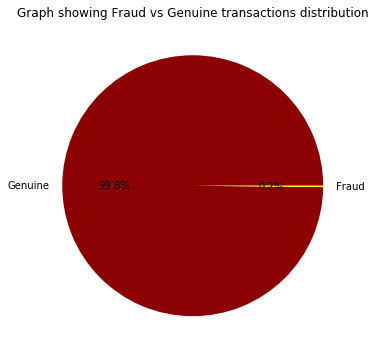

In [320]:
# Plotting a pie chart for the above information
plt.figure(figsize=(8,6))
plt.pie(data.Class.value_counts(), autopct='%1.1f%%', shadow=False, labels=['Genuine', 'Fraud'], colors=['darkred', 'yellow'])
plt.title('Graph showing Fraud vs Genuine transactions distribution')
plt.show()

In [321]:
# Time variable
print('Time variable')
data['Time_hr'] = data['Time']/3600
data['Time_hr'].tail(5)
# Converting time to hours

Time variable


284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_hr, dtype: float64

Histogram to show trends using Time of the day


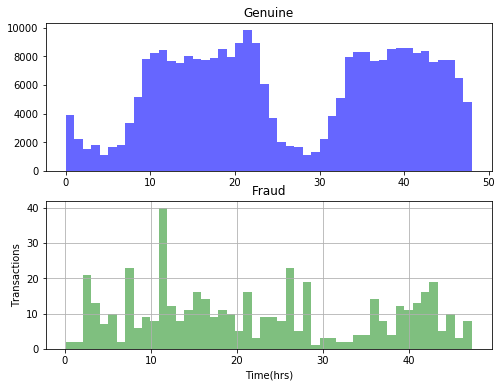

In [322]:
# Histogram to show trends using Time of the day
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6))
ax1.hist(data.Time_hr[data.Class==0], bins=48,color='b', alpha=0.6)
ax1.set_title('Genuine')
ax2.hist(data.Time_hr[data.Class==1], bins=48,color='g', alpha=0.5)
ax2.set_title('Fraud')
plt.grid()
plt.xlabel('Time(hrs)')
plt.ylabel('Transactions')
print('Histogram to show trends using Time of the day')

<i>The time feature shows that the rate of transactions picks up during day time, but number of transactions have almost similar dependence on time of the day for both classes, ideally this feature has no predictive  power to distinguish between the two classes... but this assumption will be tested later

Histogram to show trends using amount withdrawn


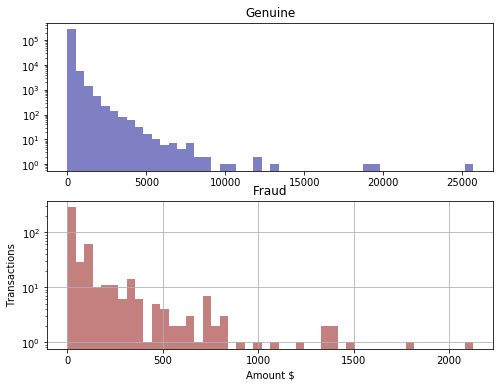

In [323]:
# Histogram to show trends using amount withdrawn
fig, (ax3, ax4) = plt.subplots(2, 1,figsize=(8,6))
ax3.hist(data.Amount[data.Class==0], bins=48,color='darkblue', alpha=0.5)
ax3.set_yscale('log') # To see the tails
ax3.set_title('Genuine')
ax4.hist(data.Amount[data.Class==1], bins=48,color='darkred', alpha=0.5)
ax4.set_yscale('log') # To see the tails
ax4.set_title('Fraud')
plt.xlabel('Amount $')
plt.ylabel('Transactions')
plt.grid()
print('Histogram to show trends using amount withdrawn')

<i>Interesting to note that "transactions" > 10,000 in Genuine Class only.. also this amount feature is not on same scale as principle components... so the amount value will be standardised for later use using the StandardScaler

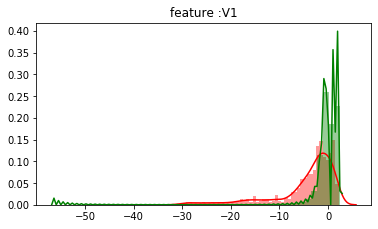

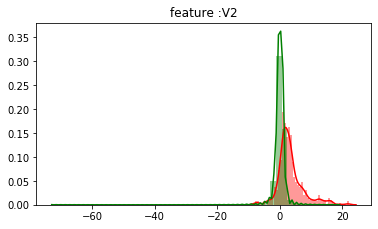

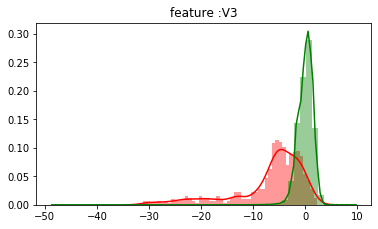

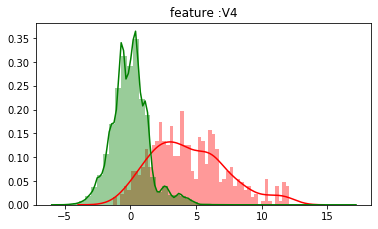

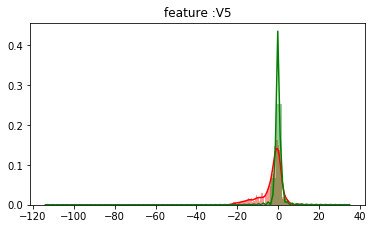

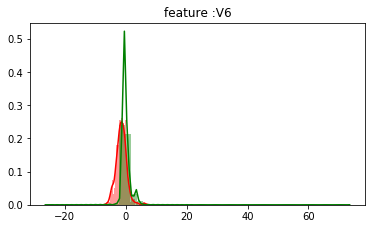

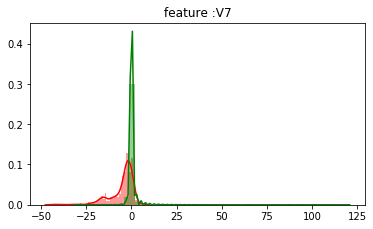

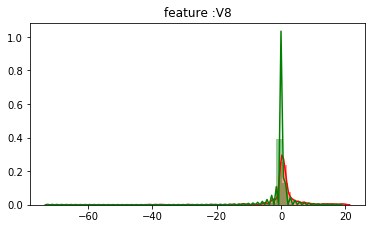

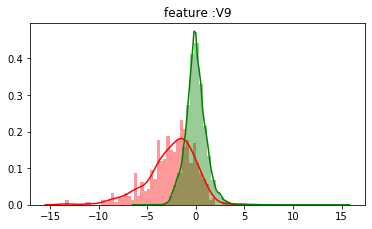

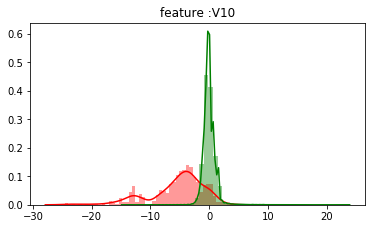

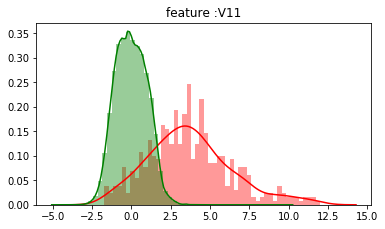

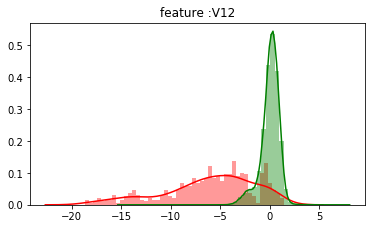

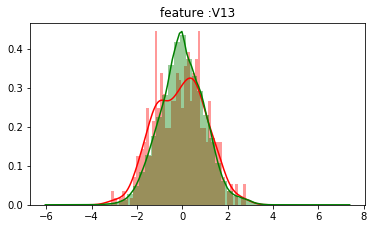

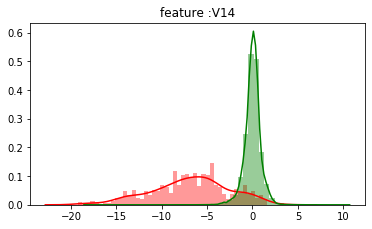

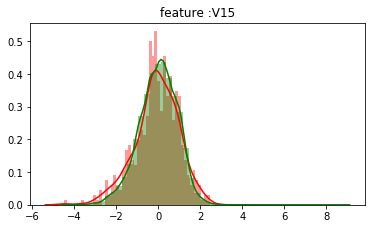

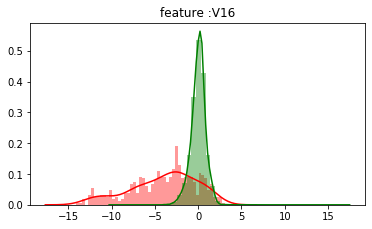

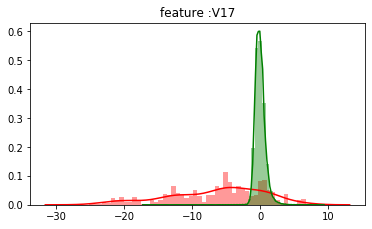

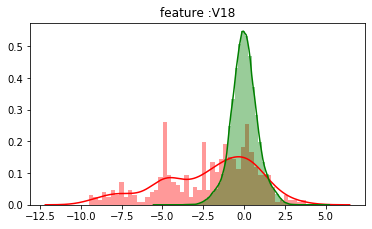

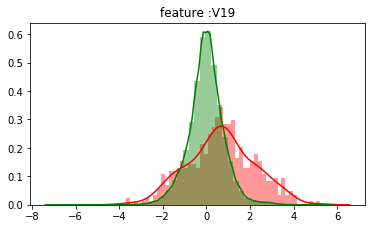

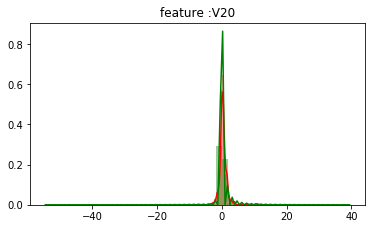

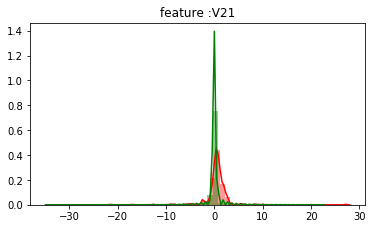

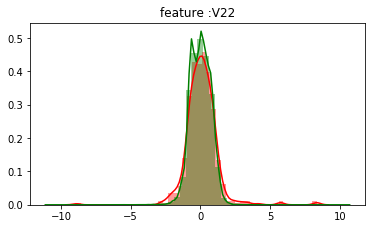

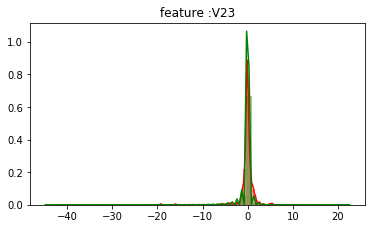

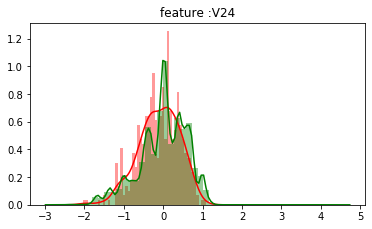

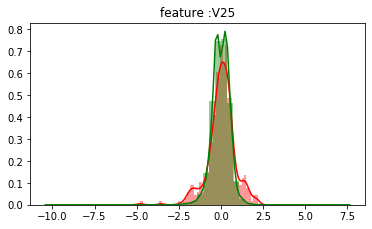

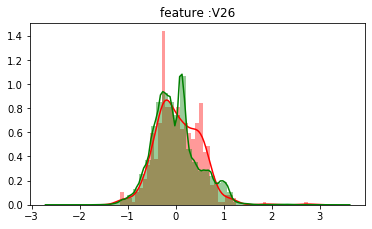

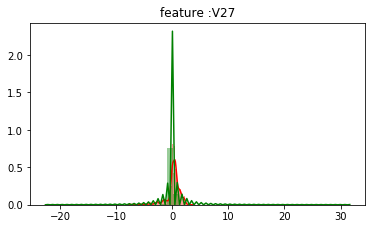

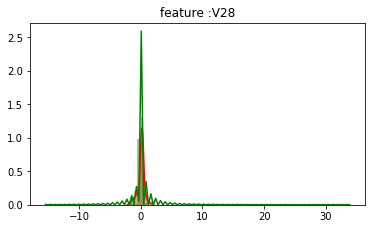

In [324]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
for i, col in enumerate(data[data.iloc[:,1:29].columns]):
    plt.figure(figsize=(6, 28*4))
    ax5 = plt.subplot(gs[i])
    sns.distplot(data[col][data.Class == 1], bins=50, color='r')
    sns.distplot(data[col][data.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature :' + str(col))
    plt.show()

In [325]:
data = data.drop(['Time_hr'], axis=1)

In [326]:
data.loc[data.Class == 0, 'Normal'] = 1
data.loc[data.Class == 1, 'Normal'] = 0
data = data.rename(columns={'Class': 'Fraud'})
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud,Normal
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1.0


In [327]:
fraud = data[data.Fraud==1]
genuine = data[data.Normal==1]

In [328]:
#Set X_train to be 80% of fraudulent transactions
X_trainF = fraud.sample(frac=0.8)

In [329]:
#Also add 80% of genuine transactions to X_train
X_trainG = genuine.sample(frac=0.8)
# Concatenating X_trainG and X_trainF
X_train = pd.concat([X_trainG, X_trainF], axis=0)
print("size of X_train :", X_train.shape)

size of X_train : (226980, 32)


In [330]:
#X_test
X_test = data.loc[~data.index.isin(X_train.index)]
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud,Normal
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,1.0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,1.0
17,13.0,-0.436905,0.918966,0.924591,-0.727219,0.915679,-0.127867,0.707642,0.087962,-0.665271,...,-0.672638,-0.156858,-0.888386,-0.342413,-0.049027,0.079692,0.131024,0.89,0,1.0
19,15.0,1.492936,-1.029346,0.454795,-1.438026,-1.555434,-0.720961,-1.080664,-0.053127,-1.978682,...,-0.175074,0.040002,0.295814,0.332931,-0.220385,0.022298,0.007602,5.00,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284781,172766.0,-1.139015,-0.155510,1.894478,-1.138957,1.451777,0.093598,0.191353,0.092211,-0.062621,...,-0.631658,-0.147249,0.212931,0.354257,-0.241068,-0.161717,-0.149188,13.00,0,1.0
284785,172768.0,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,...,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0,1.0
284786,172768.0,-2.076175,2.142238,-2.522704,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,...,-1.588269,0.588482,0.632444,-0.201064,0.199251,0.438657,0.172923,8.95,0,1.0
284789,172770.0,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,...,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,60.50,0,1.0


In [331]:
#Reshuffling the data to avoid bias
X_test = X_test.sample(frac=1)
X_train = X_train.sample(frac=1)

In [332]:
y_train = X_train.Fraud
y_train = pd.concat([y_train, X_train.Normal], axis=1)
y_test = X_test.Fraud
y_test = pd.concat([y_test, X_test.Normal], axis=1)
X_train = X_train.drop(['Fraud', 'Normal'], axis=1)
X_test = X_test.drop(['Fraud', 'Normal'], axis=1)

In [333]:
# Ensuring the X_train and y_train plus X_test and y_test all have compatible sizes
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

226980
226980
56746
56746


In [334]:
fraud_Counts = len(X_trainF)
ratio = fraud_Counts/len(X_train)
y_train *= ratio
y_test *= ratio

In [335]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Fraud', 'Normal'],
      dtype='object')

In [336]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [337]:
X_test

array([[ 1.06276172e+00,  9.28319948e-01, -1.03215929e-01, ...,
        -5.65370668e-02, -4.22325758e-02,  8.15309113e-02],
       [-1.26398309e+00, -5.68513623e-01,  4.49662064e-01, ...,
        -4.07934935e-03, -9.44349694e-04,  4.89223341e-01],
       [ 2.89795448e-01,  9.70325832e-01, -4.38292814e-01, ...,
         7.03297117e-02, -1.22453313e-01, -2.90049902e-01],
       ...,
       [-4.46927846e-01,  6.44359344e-01, -3.98249159e-01, ...,
        -9.42683539e-02,  5.46845258e-02, -2.51536563e-01],
       [-1.13489244e+00, -1.48807410e+00,  1.85308982e+00, ...,
        -5.55424601e-02,  2.57023159e-01, -2.94896235e-01],
       [-7.99324069e-01, -6.09092762e-01, -2.04432512e-02, ...,
        -9.06136100e-01, -5.56889503e-01,  3.96156586e-01]])

In [338]:
X_train

array([[-1.41823433e+00, -2.35869042e+00, -1.43790238e+00, ...,
         1.73671239e+00, -3.82025040e-01,  1.71833272e+00],
       [ 7.54228427e-01, -4.10077930e-01,  1.34048917e-01, ...,
         1.10662503e-04, -6.94254431e-01, -3.01910562e-01],
       [ 1.55975330e+00, -7.37028521e-01,  1.28301942e+00, ...,
         7.41863424e-01, -5.36506855e-01, -3.45521415e-01],
       ...,
       [ 1.23598434e+00,  6.72931706e-02,  4.51942056e-01, ...,
         1.00466013e+00,  5.56958594e-01, -2.67296904e-01],
       [ 1.01755405e+00, -9.44651576e-01,  1.04120856e+00, ...,
        -4.72606451e-02, -1.08836001e+00, -2.70479317e-01],
       [ 1.37153415e+00,  9.24328047e-01, -6.28550544e-01, ...,
         1.21129907e-01, -4.73058014e-02,  8.23756991e-02]])

In [339]:
split = int(len(y_test)/2) # we use int to avoid decimal points
split

28373

In [340]:
inputX = np.asmatrix(X_train)
inputY = np.asmatrix(y_train)
inputX_validation = np.asmatrix(X_test)[:split]
inputY_validation = np.asmatrix(y_test)[:split]
inputX_test = np.asmatrix(X_test)[split:]
inputY_test = np.asmatrix(y_test)[split:]

In [341]:
X_train.shape

(226980, 30)

In [342]:
inputX_validation

matrix([[ 1.06276172e+00,  9.28319948e-01, -1.03215929e-01, ...,
         -5.65370668e-02, -4.22325758e-02,  8.15309113e-02],
        [-1.26398309e+00, -5.68513623e-01,  4.49662064e-01, ...,
         -4.07934935e-03, -9.44349694e-04,  4.89223341e-01],
        [ 2.89795448e-01,  9.70325832e-01, -4.38292814e-01, ...,
          7.03297117e-02, -1.22453313e-01, -2.90049902e-01],
        ...,
        [ 1.43575103e+00,  9.85912702e-01, -2.81181581e-01, ...,
          4.76439388e-02, -1.16828038e-01, -3.11107864e-01],
        [-8.81906745e-01,  6.08367124e-01,  2.31321023e-01, ...,
          8.42591657e-02,  5.91262366e-02, -3.39156554e-01],
        [-3.04732509e-01,  1.21864948e-01, -6.30590471e-01, ...,
          1.33546276e-01,  2.88775638e-01,  1.11761693e+00]])

In [343]:
inputY_test

matrix([[0.        , 0.00166534],
        [0.        , 0.00166534],
        [0.        , 0.00166534],
        ...,
        [0.        , 0.00166534],
        [0.        , 0.00166534],
        [0.        , 0.00166534]])

In [344]:
import tensorflow.compat.v1 as tf
import os
tf.disable_eager_execution()

In [345]:
input_nodes = 30
multiplier = 1.5
hidden_nodes1 = 18
hidden_nodes2 = int(hidden_nodes1*multiplier)
hidden_nodes3 = int(hidden_nodes2*multiplier)
#percentage of nodes to keep for dropout
pkeep = tf.placeholder(tf.float32, name='pkeep')

X = tf.placeholder(tf.float32, [None, input_nodes])
#layer1
W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1],stddev=0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(X, W1)+ b1)
#layer2
W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev=0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2)+b2)
#layer3
W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev=0.15))
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.sigmoid(tf.matmul(y2,W3)+b3)
y3 = tf.nn.dropout(y3, pkeep)
#layer4
W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev=0.15))
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4)+b4)
#output
y = y4
y_ = tf.placeholder(tf.float32)

In [346]:
#parameters
training_epochs = 4
training_dropout = 0.20
display_step = 1 
n_samples = y_train.shape[0]
batch_size = 2000
learning_rate= 0.001

# Cost function: Cross_entropy
cost = -tf.reduce_sum(y_*tf.log(y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
# correct prediction
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [347]:
accuracy_summary = [] # Record accuracy values for plot
cost_summary = [] # Record cost values for plot
validation_accuracy_summary = [] 
validation_cost_summary = [] 
stop_early = 0 # To keep track of the number of epochs before early stopping

# Save the best weights so that they can be used to make the final predictions
checkpoint_directory = "../Recurrent Neural Networks"
checkpoint_prefix = os.path.join(checkpoint_directory, "credit")
#checkpoint = tf.train.Checkpoint(optimizer=optimizer)
#checkpoint_dir = os.path.dirname(checkpoint_path)
saver = tf.train.Saver(max_to_keep=1, filename=checkpoint_directory)
#tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=False, verbose=1)
# Initialize variables and tensorflow session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            X_batch = inputX[batch*batch_size : (1+batch)*batch_size]
            y_batch = inputY[batch*batch_size : (1+batch)*batch_size]

            sess.run([optimizer], feed_dict={X: X_batch, 
                                             y_: y_batch,
                                             pkeep: training_dropout})

        # Display logs after every 4 epochs
        if (epoch) % display_step == 0:
            train_accuracy, new_cost = sess.run([accuracy, cost], feed_dict={X: inputX, 
                                                                            y_: inputY,
                                                                            pkeep: training_dropout})

            validation_accuracy, validation_new_cost = sess.run([accuracy, cost], feed_dict={X: inputX_validation, 
                                                                                  y_: inputY_validation,
                                                                                  pkeep: 1})

            print ("Epoch:", epoch,
                   "Acc =", "{:.5f}".format(train_accuracy), 
                   "Cost =", "{:.5f}".format(new_cost),
                   "Valid_Acc =", "{:.5f}".format(validation_accuracy), 
                   "Valid_Cost = ", "{:.5f}".format(validation_new_cost))
            
            # Save the weights if these conditions are met.
            #if epoch > 0 and valid_accuracy > max(valid_accuracy_summary) and valid_accuracy > 0.999:
            #    saver.save(sess, checkpoint)
            
            # Record the results of the model
            accuracy_summary.append(train_accuracy)
            cost_summary.append(new_cost)
            validation_accuracy_summary.append(validation_accuracy)
            validation_cost_summary.append(validation_new_cost)
            
            # If the model does not improve after 15 logs, stop the training.
            if validation_accuracy < max(validation_accuracy_summary) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0
            
    print()
    print("**Optimization Finished**")
    print()   
    

Epoch: 0 Acc = 0.99652 Cost = 17.21223 Valid_Acc = 0.99841 Valid_Cost =  0.72255
Epoch: 1 Acc = 0.99770 Cost = 10.40291 Valid_Acc = 0.99841 Valid_Cost =  0.53516
Epoch: 2 Acc = 0.99789 Cost = 8.51184 Valid_Acc = 0.99841 Valid_Cost =  0.53812
Epoch: 3 Acc = 0.99815 Cost = 7.74684 Valid_Acc = 0.99841 Valid_Cost =  0.55694

**Optimization Finished**



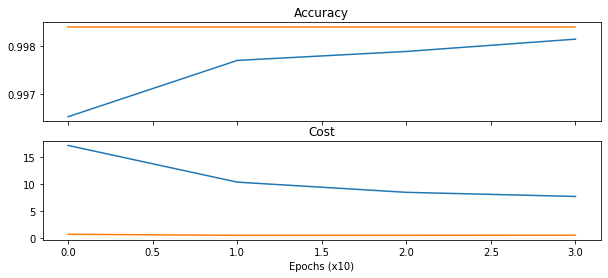

In [348]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.plot(accuracy_summary) # blue
ax1.plot(validation_accuracy_summary) # green
ax1.set_title('Accuracy')

ax2.plot(cost_summary)
ax2.plot(validation_cost_summary)
ax2.set_title('Cost')

plt.xlabel('Epochs (x10)')
plt.show()

# Visualizing the Data with t-SNE
First we are going to use t-SNE with the original data, then with the data we used for training our neural network. I expect/hope that the second scatter plot will show a clearer contrast between the normal and the fraudulent transactions. If this is the case, its signals that the work done during the feature engineering stage of the analysis was beneficial to helping the neural network understand the data.

In [120]:

tsne_data = pd.read_csv(r'C:\adrian kasito\adrian\credit_card.txt')
tsne_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [121]:
#Set df2 equal to all of the fraulent and 10,000 normal transactions.
df2 = tsne_data[tsne_data.Class == 1]
df2 = pd.concat([df2, tsne_data[tsne_data.Class == 0].sample(n=10000)], axis = 0)
df2.shape

(10492, 31)

In [122]:
#Scale features to improve the training ability of TSNE.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df2_std = standard_scaler.fit_transform(df2)


y = df2.iloc[:,-1].values
y.shape

(10492,)

In [123]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df2_std)

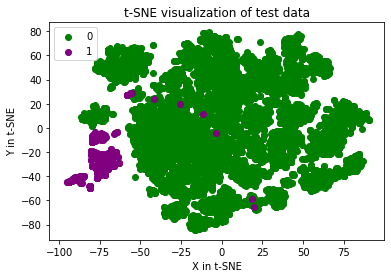

In [124]:
#Build the scatter plot with the two types of transactions.
color_map = {0:'green', 1:'purple'}
plt.figure(figsize=(6,4))
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], 
                y = x_test_2d[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

<i>The are two main groupings of fraudulent transactions, while the remaineder are mixed within the rest of the data.

Note: I have only used 10,000 of the 284,315 normal transactions for this visualization. I would have liked to of used more, but my laptop crashes if many more than 10,000 transactions are included. With only 3.15% of the data being used, there should be some accuracy to this plot, but I am confident that the layout would look different if all of the transactions were included.

In [125]:
#Set df_used to the fraudulent transactions' dataset.
df_used = fraud

#Add 10,000 genuine transactions to df_used.
df_used = pd.concat([df_used, genuine.sample(n = 10000)], axis = 0)
df_used

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud,Normal
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,0.0
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,0.0
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,0.0
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,0.0
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221193,142467.0,1.471135,-2.704810,-1.292003,-1.585145,-0.963754,1.348109,-1.091327,0.267493,-1.372588,...,0.310932,-0.062891,-1.619789,-0.556801,-0.103357,0.008457,-0.009278,368.00,0,1.0
83434,59849.0,1.424160,-1.189290,0.843657,-1.278588,-1.884120,-0.725154,-1.235663,-0.158011,-1.609763,...,0.440221,-0.070285,0.409548,0.374668,-0.052518,0.052068,0.034937,49.00,0,1.0
241022,150849.0,-2.431718,-0.647940,-2.722590,-0.909162,-2.797594,0.996144,4.353803,-0.293052,-2.634843,...,-0.085966,-0.304859,-0.890300,1.463128,1.294627,0.052522,-0.578004,950.96,0,1.0
112476,72663.0,-0.873320,0.366651,1.653962,0.425035,1.081208,-0.491401,0.625954,-0.189811,0.036025,...,0.072151,-0.350354,0.102940,0.326399,-0.499050,-0.188708,-0.231854,1.00,0,1.0


In [126]:
#Scale features to improve the training ability of TSNE.
df_used_std = standard_scaler.fit_transform(df_used)

#Set y_used equal to the target values.
y_used = df_used.iloc[:,-1].values
y_used

array([0., 0., 0., ..., 1., 1., 1.])

In [127]:
x_test_2d_used = tsne.fit_transform(df_used_std)
x_test_2d_used

array([[-65.026764 , -54.41212  ],
       [-45.75508  , -55.158867 ],
       [-64.2563   , -54.945408 ],
       ...,
       [ 43.703022 ,  52.558533 ],
       [-14.063498 ,  -0.5310396],
       [-18.63461  ,  11.775923 ]], dtype=float32)

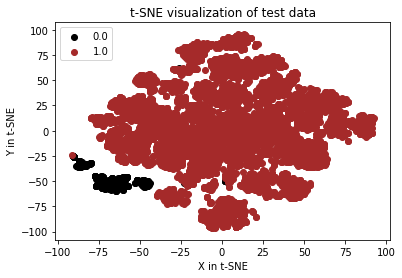

In [128]:
color_map = {1:'brown', 0:'black'}
plt.figure(figsize=(6,4))
for idx, cl in enumerate(np.unique(y_used)):
    plt.scatter(x=x_test_2d_used[y_used==cl,0], 
                y=x_test_2d_used[y_used==cl,1], 
                c=color_map[idx], 
                label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

<i>It appears that the work we did in the feature engineering stage of this analysis has been for the best. We can see that the fraudulent transactions are all part of a group of points. This suggests that it is easier for a model to identify the fraudulent transactions in the testing data, and to learn about the traits of the fraudulent transactions in the training data.